<a href="https://colab.research.google.com/github/aschoudry/ML_imageClassifier/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

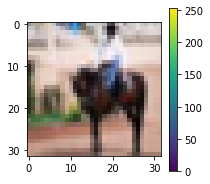

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(3,3)
im = ax.imshow(x_train[11])
plt.colorbar(im)

plt.show()

In [4]:
y_train[11]

array([7], dtype=uint8)

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
y_test = to_categorical(y_test)

In [9]:
y_test.shape

(10000, 10)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(128, (5,5), activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(256, (5,5), activation='relu', padding='valid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                64010     
Total params: 893,194
Trainable params: 893,194
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]) 

In [13]:
history = model.fit(x = x_train, y=y_train, batch_size=128,epochs=100, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 15s 32ms/step - loss: 2.1527 - accuracy: 0.2233 - val_loss: 1.9761 - val_accuracy: 0.3033
Epoch 2/100
391/391 [==============================] - 12s 30ms/step - loss: 1.9170 - accuracy: 0.3207 - val_loss: 1.8418 - val_accuracy: 0.3426
Epoch 3/100
391/391 [==============================] - 12s 30ms/step - loss: 1.7750 - accuracy: 0.3758 - val_loss: 1.6891 - val_accuracy: 0.4081
Epoch 4/100
391/391 [==============================] - 12s 31ms/step - loss: 1.6544 - accuracy: 0.4179 - val_loss: 1.6255 - val_accuracy: 0.4234
Epoch 5/100
391/391 [==============================] - 12s 31ms/step - loss: 1.5652 - accuracy: 0.4471 - val_loss: 1.5103 - val_accuracy: 0.4652
Epoch 6/100
391/391 [==============================] - 12s 31ms/step - loss: 1.5029 - accuracy: 0.4717 - val_loss: 1.4625 - val_accuracy: 0.4819
Epoch 7/100
391/391 [==============================] - 12s 31ms/step - loss: 1.4573 - accuracy: 0.4854 - val_loss: 1.4966 - val_ac

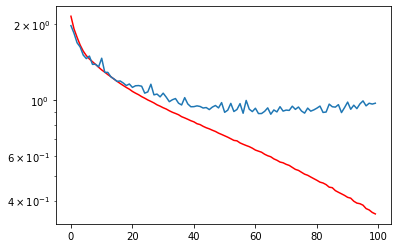

In [14]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'])
plt.yscale("log")

In [15]:
np.argmax(model.predict(x_test[4][None]))

4

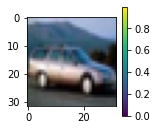

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(2,2)
im = ax.imshow(x_train[4])
plt.colorbar(im)

plt.show()